In [3]:
# Mohammad Ali Zahir
# Student ID: 40077619
# COMP 333 - Data Analytics
# Objective: apply Python and pandas for data wranglingllustrate their use within the notebook.
# Output: Show how the data wrangling works

In [4]:
!pip install distance

# Librairies

In [5]:
import pandas as pd
import seaborn as sns
import distance as dist
import numpy as np
from sklearn.cluster import AffinityPropagation

# Loading the dataset

In [6]:
initial_df = pd.read_csv('./data/Portal_rodents_19772002_scinameUUIDs.csv', encoding = "ISO-8859-1")

initial_df.head()

C:\Users\Ali\AppData\Local\Temp\ipykernel_37756\2272911397.py:1: DtypeWarning: Columns (11,12,13,16,17,18,33,35) have mixed types. Specify dtype option on import or set low_memory=False.
  initial_df = pd.read_csv('./data/Portal_rodents_19772002_scinameUUIDs.csv', encoding = "ISO-8859-1")


,survey_id,recordID,mo,dy,yr,period,plot_id,plot,note1,stake,...,tag,note2,ltag,note3,prevrt,prevlet,nestdir,neststk,note4,note5
0,491ec41b-0a80-4ce9-b754-2983c6f38e71,6545,9,18,1982,62.0,4dc16022-f28d-4b9d-9062-c7bc3ad43362,13,13.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f280bade-4e9b-447d-afe0-9e6d45e6bfb0,5220,1,24,1982,54.0,dcbbd373-c22e-46ef-ae8b-ad88f5cf7475,20,13.0,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2b1b4a8a-c3e9-4781-a5f9-18b081383876,18932,8,7,1991,162.0,1e87b11b-4795-4f41-bdff-2d5c4412be25,19,13.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
3,e98e66c4-514b-45f7-9d95-336c05a72b21,20588,1,24,1993,179.0,91829d58-c12e-47e8-ae31-185f46be21d2,12,13.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,768cdd0d-93bc-4c74-9dcd-d1ed48b7501e,7020,11,21,1982,63.0,f24f2db6-eadd-4de9-9d2f-95aea376c013,24,13.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Functions for data wrangling

## Step 1: String Processing

In [7]:
# Create a function which applies remove whitespace and the start and at the front and removes internal whitespace

def string_processing(df):
  # select all columns that have string data type
  object_cols = df.select_dtypes(include=['object']).columns

  # apply strip method to each string column
  df[object_cols] = df[object_cols].apply(lambda x: x.str.strip())

  # replace internal whitespace with a single space
  df[object_cols] = df[object_cols].replace('\s+', ' ', regex=True)

## Step 2: Creating different facets for variables

In [8]:
# Create a function which returns the values for all the columns and then sorts them
def text_facet(df, column: str):
    return df[column].value_counts().sort_index()

In [9]:
# Previewing the function fo the scientific name column with the string not being processed

text_facet(initial_df, 'scientificName')


  Amphispiza bilineata                 1
  Amphispiza bilineata                 1
Ammodramus savannarum                  2
Ammospermophilis harrisi               1
Ammospermophilus harrisi             435
Ammospermophilus harrisii              1
Amphespiza bilineata                   7
Amphispiza bilineata                 289
Amphispiza bilineatus                  1
Amphispiza cilineata                   1
Amphispizo bilineata                   1
Baiomys taylori                       46
Calamospiza melanocorys                1
Callipepla squamata                    1
Campylorhynchus brunneicapillus        1
Chaetodipus baileyi                    2
Cnemidophorus tigris                   1
Cnemidophorus uniparens                1
Crotalus scutalatus                    1
Crotalus viridis                       1
Dipodomys merriami                 10596
Dipodomys ordii                     3027
Dipodomys spectabilis               2504
Dipodomys sp.                         40
Emphispiza bilin

In [10]:
# Applying the string processing function to the dataframe
string_processing(initial_df)

In [11]:
# Previewing the function fo the scientific name column with the string processed

text_facet(initial_df, 'scientificName')


Ammodramus savannarum                  2
Ammospermophilis harrisi               1
Ammospermophilus harrisi             435
Ammospermophilus harrisii              1
Amphespiza bilineata                   7
Amphispiza bilineata                 291
Amphispiza bilineatus                  1
Amphispiza cilineata                   1
Amphispizo bilineata                   1
Baiomys taylori                       46
Calamospiza melanocorys                1
Callipepla squamata                    1
Campylorhynchus brunneicapillus        1
Chaetodipus baileyi                    2
Cnemidophorus tigris                   1
Cnemidophorus uniparens                1
Crotalus scutalatus                    1
Crotalus viridis                       1
Dipodomys merriami                 10596
Dipodomys ordii                     3027
Dipodomys sp.                         40
Dipodomys spectabilis               2504
Emphispiza bilinata                    2
Onychomys leucogaster               1006
Onychomys sp.   

In [12]:
def numeric_facet(df, column, use_log_scaling=False):
    # Check if the column is a numeric column
    if df[column].dtype.kind in 'iufc':
        # Use the text_facet function to clean up the column values
        updated_df = text_facet(df, column)
        # Use sns.histplot to create a histogram of the column values, x is column value here so we use log_scaling == False
        sns.histplot(df, x=column, log_scale=(False, use_log_scaling), hue=column, legend= False)
        # Print the cleaned up column values
        print(f"The column {column} has the following values:")
        print(updated_df)
    else:
        # Print an error message if the column is not a numeric column
        print(f"The column {column} is not a numeric column")


The column yr has the following values:
1977     503
1978    1048
1979     719
1980    1415
1981    1472
1982    1978
1983    1673
1984     981
1985    1438
1986     942
1987    1671
1988    1469
1989    1569
1990    1311
1991    1347
1992    1038
1993     750
1994     668
1995    1222
1996    1706
1997    2493
1998    1610
1999    1135
2000    1552
2001    1610
2002    2229
Name: yr, dtype: int64


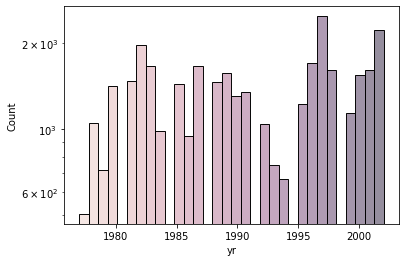

In [13]:
# Trying out the value on a numeric column such as yr 
numeric_facet(initial_df, 'yr', True)

In [28]:
# Creating a scatterplot facet for the numerical data

def scatter_facet(df, column:str):
    if df[column].dtype.kind in 'iufc':
        updated_df = text_facet(df, column)
        sns.scatterplot(data=df, x=column, y=df[column].value_counts(), hue=column, legend=False)
        print(f"The column {column} has the following values:")
        print(updated_df)
    
    else:
        # Print an error message if the column is not a numeric column
        print(f"The column {column} is not a numeric column")

        

The column mo has the following values:
1     2518
2     2796
3     3390
4     3443
5     3073
6     2697
7     3633
8     2369
9     2751
10    3064
11    3016
12    2799
Name: mo, dtype: int64


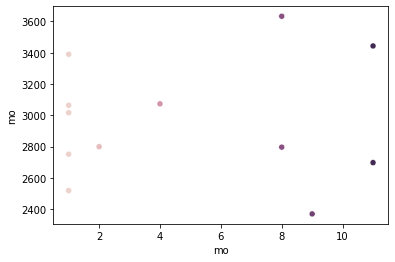

In [32]:
# Trying with a numerical column 
scatter_facet(initial_df, 'mo')

In [30]:
# Trying it with a non-numerical column

scatter_facet(initial_df, 'scientificName')

The column scientificName is not a numeric column


# Part 3: Clustering the data

In [16]:

def cluster_data(df, column: str):
    # Get all unique values in the given column
    columns = df[column].unique()
    # Filter out null values
    columns = np.asarray(list(filter(lambda x: pd.isnull(x) == False , columns)))

    
    # Check if all values are strings
    if not all(isinstance(x, str) for x in columns):
        return f"All the values in column {column} are not strings"
    
    print(f'Beginning clustering for column {column}...')

    
    # Compute a similarity matrix for all values using Levenshtein distance
    sim_matrix = -1*np.array([[dist.levenshtein(value1, value2) for value1 in columns] for value2 in columns])
    # Perform affinity propagation clustering on the similarity matrix
    aff_prop = AffinityPropagation(affinity="precomputed", damping=0.5)
    aff_prop.fit(sim_matrix)
    
    # Iterate over all clusters
    for cluster_id in np.unique(aff_prop.labels_):
        # Find the cluster center (i.e., value that is most similar to all other values in the cluster)
        new_col_name = columns[aff_prop.cluster_centers_indices_[cluster_id]]
        # Find all values that belong to the current cluster
        cluster = np.unique(columns[np.nonzero(aff_prop.labels_==cluster_id)])
        # Print the cluster center and all values in the cluster
        print("\nCluster number: " + str(cluster_id) + ": " + new_col_name)
        print(cluster)
        # Replace all values in the cluster with the cluster center value
        for x in cluster:
            df.loc[df[column] == x, column] = new_col_name


In [17]:
# Cluster the data for the scientficName column 
cluster_data(initial_df, 'scientificName')

Beginning clustering for column scientificName...

Cluster number: 0: Amphispiza bilineata
['Amphespiza bilineata' 'Amphispiza bilineata' 'Amphispiza bilineatus'
 'Amphispiza cilineata' 'Amphispizo bilineata' 'Calamospiza melanocorys'
 'Emphispiza bilinata']

Cluster number: 1: Ammospermophilus harrisi
['Ammospermophilis harrisi' 'Ammospermophilus harrisi'
 'Ammospermophilus harrisii']

Cluster number: 2: Campylorhynchus brunneicapillus
['Campylorhynchus brunneicapillus']

Cluster number: 3: Cnemidophorus tigris
['Cnemidophorus tigris' 'Cnemidophorus uniparens']

Cluster number: 4: Crotalus scutalatus
['Ammodramus savannarum' 'Callipepla squamata' 'Crotalus scutalatus'
 'Crotalus viridis']

Cluster number: 5: Dipodomys ordii
['Baiomys taylori' 'Chaetodipus baileyi' 'Dipodomys merriami'
 'Dipodomys ordii' 'Dipodomys sp.' 'Dipodomys spectabilis']

Cluster number: 6: Onychomys torridus
['Onychomys leucogaster' 'Onychomys sp.' 'Onychomys torridus']


In [18]:
# Cluster the data for the yr column

cluster_data(initial_df, 'yr')

'All the values in column yr are not strings'